In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [130]:
df = pd.read_csv("superstore.csv")

# Data preparation

In [131]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [133]:
df.describe()

Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

In [134]:
df.drop(["Row ID"],inplace=True, axis=1)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [136]:
# Change format to date time
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') 

In [137]:
# Sort by date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [138]:
# Fixing nulls
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [139]:
df[df['Postal Code'].isnull()]

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
5274  CA-2016-162887 2016-11-07 2016-11-09    Second Class    SV-20785   
9741  CA-2016-117086 2016-11-08 2016-11-12  Standard Class    QJ-19255   
9146  US-2017-165505 2017-01-23 2017-01-27  Standard Class    CB-12535   
9148  US-2017-165505 2017-01-23 2017-01-27  Standard Class    CB-12535   
9147  US-2017-165505 2017-01-23 2017-01-27  Standard Class    CB-12535   
8798  US-2017-150140 2017-04-06 2017-04-10  Standard Class    VM-21685   
9388  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9389  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9387  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
9386  US-2018-127292 2018-01-19 2018-01-23  Standard Class    RM-19375   
2234  CA-2018-104066 2018-12-05 2018-12-10  Standard Class    QJ-19255   

         Customer Name      Segment        Country        City    State  \
5274  Stewart Visinsky     Consumer  United States  Burlington  Vermont   
9741      Quincy Jones    Corporate  United States  Burlington  Vermont   
9146  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
9148  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
9147  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
8798   Valerie Mitchum  Home Office  United States  Burlington  Vermont   
9388     Raymond Messe     Consumer  United States  Burlington  Vermont   
9389     Raymond Messe     Consumer  United States  Burlington  Vermont   
9387     Raymond Messe     Consumer  United States  Burlington  Vermont   
9386     Raymond Messe     Consumer  United States  Burlington  Vermont   
2234      Quincy Jones    Corporate  United States  Burlington  Vermont   

      Postal Code Region       Product ID         Category Sub-Category  \
5274          NaN   East  FUR-CH-10000595        Furniture       Chairs   
9741          NaN   East  FUR-BO-10004834        Furniture    Bookcases   
9146          NaN   East  TEC-AC-10002926       Technology  Accessories   
9148          NaN   East  OFF-ST-10001526  Office Supplies      Storage   
9147          NaN   East  OFF-AR-10003477  Office Supplies          Art   
8798          NaN   East  TEC-PH-10002555       Technology       Phones   
9388          NaN   East  OFF-AP-10000828  Office Supplies   Appliances   
9389          NaN   East  OFF-EN-10001509  Office Supplies    Envelopes   
9387          NaN   East  OFF-PA-10001970  Office Supplies        Paper   
9386          NaN   East  OFF-PA-10000157  Office Supplies        Paper   
2234          NaN   East  TEC-AC-10001013       Technology  Accessories   

                                           Product Name    Sales  
5274                    Safco Contoured Stacking Chairs   715.20  
9741  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.90  
9146              Logitech Wireless Marathon Mouse M705    99.98  
9148              Iceberg Mobile Mega Data/Printer Cart  1564.29  
9147                                  4009 Highlighters     8.04  
8798                Nortel Meridian M5316 Digital phone  1294.75  
9388                    Avanti 4.4 Cu. Ft. Refrigerator   542.94  
9389                          Poly String Tie Envelopes     2.04  
9387                                         Xerox 1881    12.28  
9386                                          Xerox 191    79.92  
2234        Logitech ClearChat Comfort/USB Headset H390   205.03

In [140]:
 # Replacing null postal code for Burlington city
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [141]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 7980 to 5091
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 non

# Exploratory data analysis

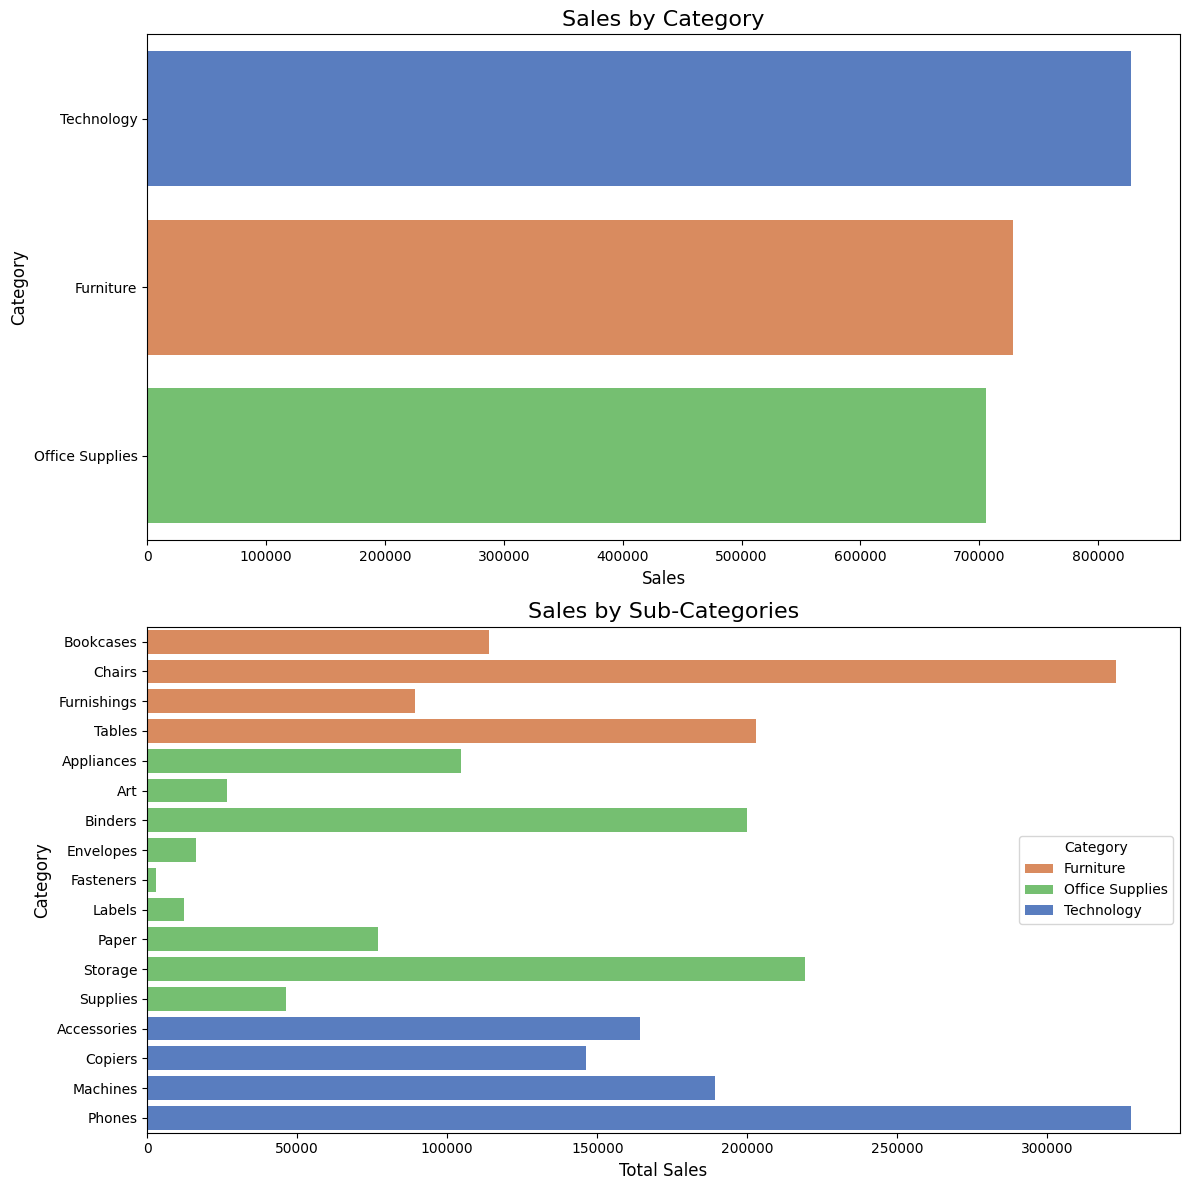

In [143]:
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_subcategory_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Define a consistent color palette for the categories
categories = top_categories.index
palette = sns.color_palette("muted", len(categories))
category_colors = dict(zip(categories, palette))

# First subplot: Sales by Category
plt.subplot(2, 1, 1)  
sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    palette=category_colors
)
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Second subplot: Sales by Categories and Sub-Categories
plt.subplot(2, 1, 2) 

sns.barplot(
    data=category_subcategory_sales,
    x='Sales', 
    y='Sub-Category',
    hue='Category', 
    palette=category_colors
)
plt.title('Sales by Sub-Categories', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)


plt.tight_layout()
plt.show()


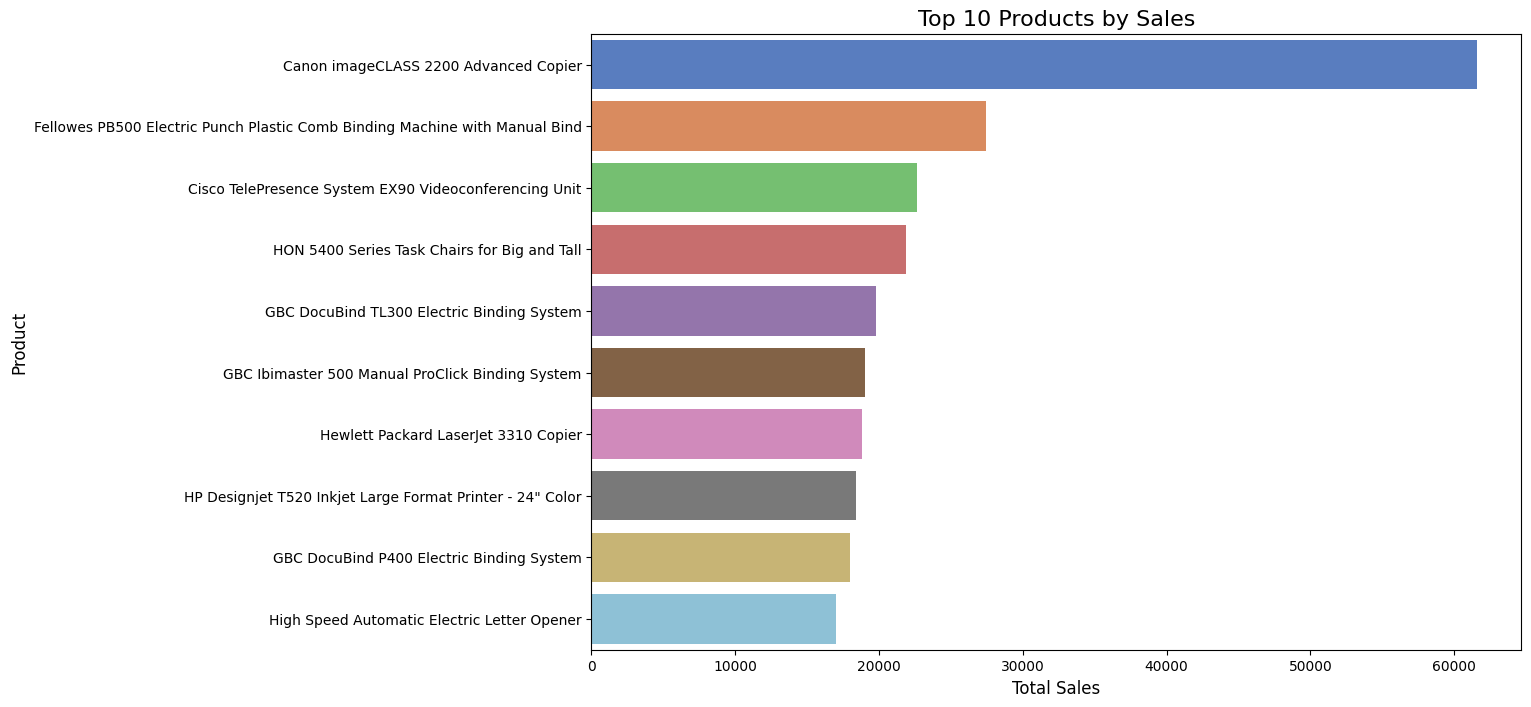

In [144]:
# Top 10 products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette="muted"
)
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

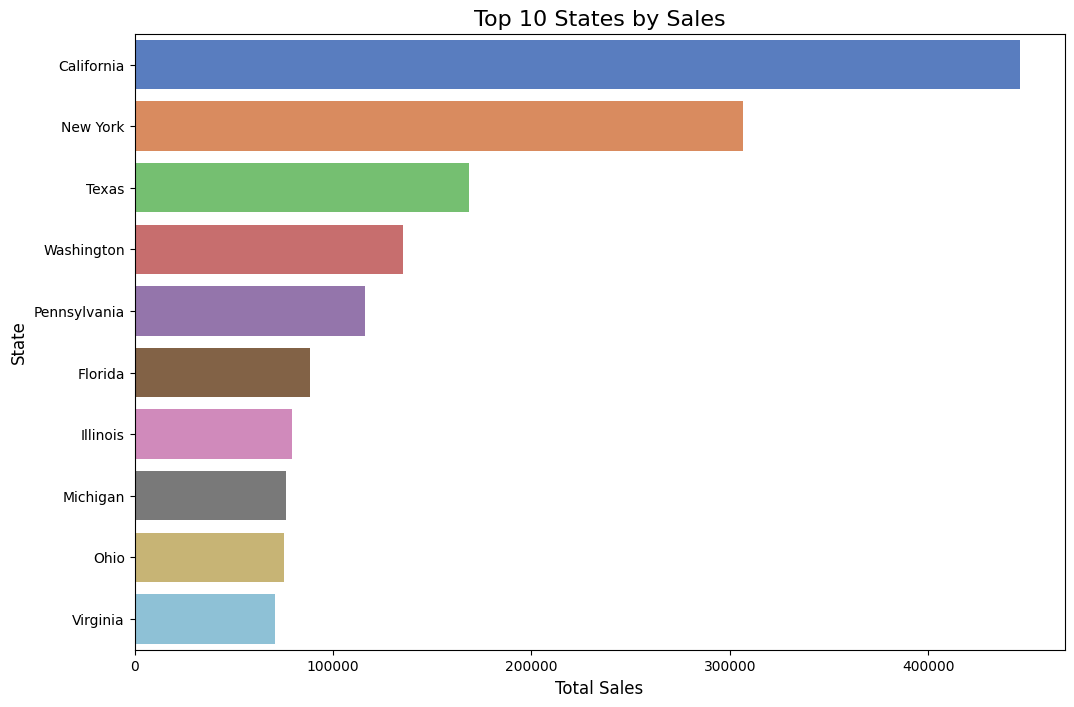

In [145]:
# Top 10 states
top_products = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette="muted"
)
plt.title('Top 10 States by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

In [146]:
import plotly.express as px
import geopandas as gpd


state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Load geographical data for US states (GeoPandas)
gdf = gpd.read_file("gz_2010_us_040_00_500k.json")  # Replace with your file path


state_sales = state_sales.set_index('State')
merged_gdf = gdf.merge(state_sales, left_on='NAME', right_index=True, how='left')


fig = px.choropleth(
    merged_gdf,  # GeoDataFrame containing geographical and sales data
    geojson=merged_gdf.geometry,  # Geometry column from GeoDataFrame
    locations=merged_gdf.index,  # Locations will be the index of the merged data (states)
    color='Sales',  # Column for coloring (Sales)
    hover_name=merged_gdf['NAME'],  # Show state names on hover
    color_continuous_scale='YlGnBu',  # Color scale for sales
    labels={'Sales': 'Total Sales'},  # Label for the color scale
    title='Sales Heatmap by State'
)


fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_x=0.5, 
    width=1200,  
    height=800 
)

fig.show()


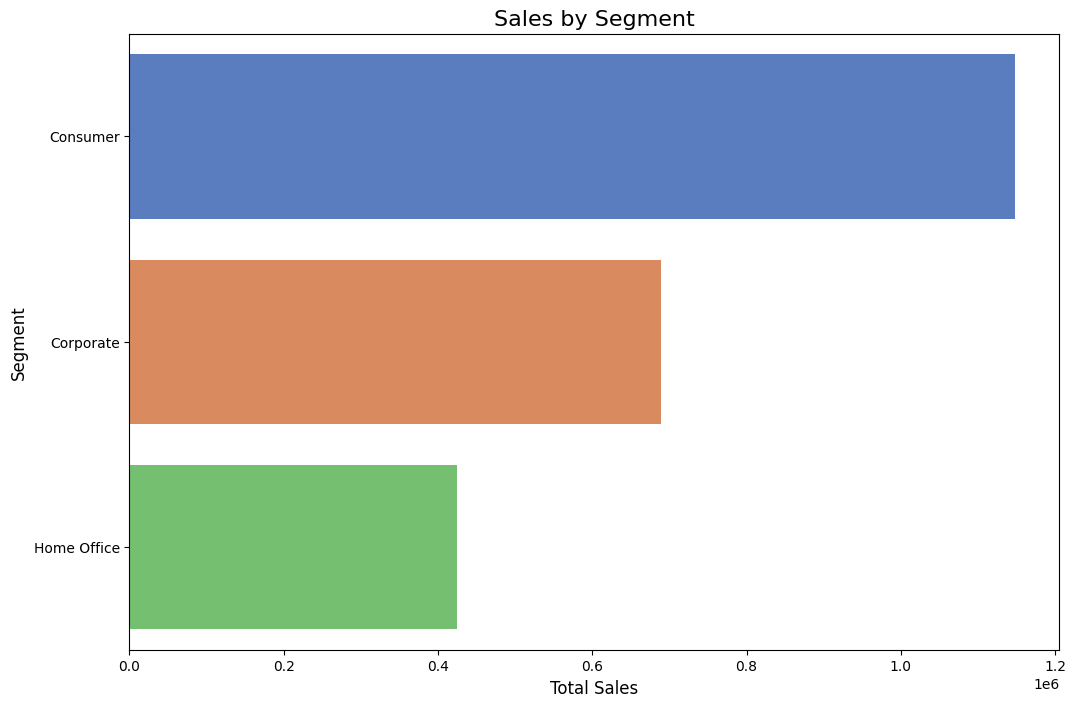

In [147]:
# Sales by segment
top_products = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette="muted"
)
plt.title('Sales by Segment', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.show()

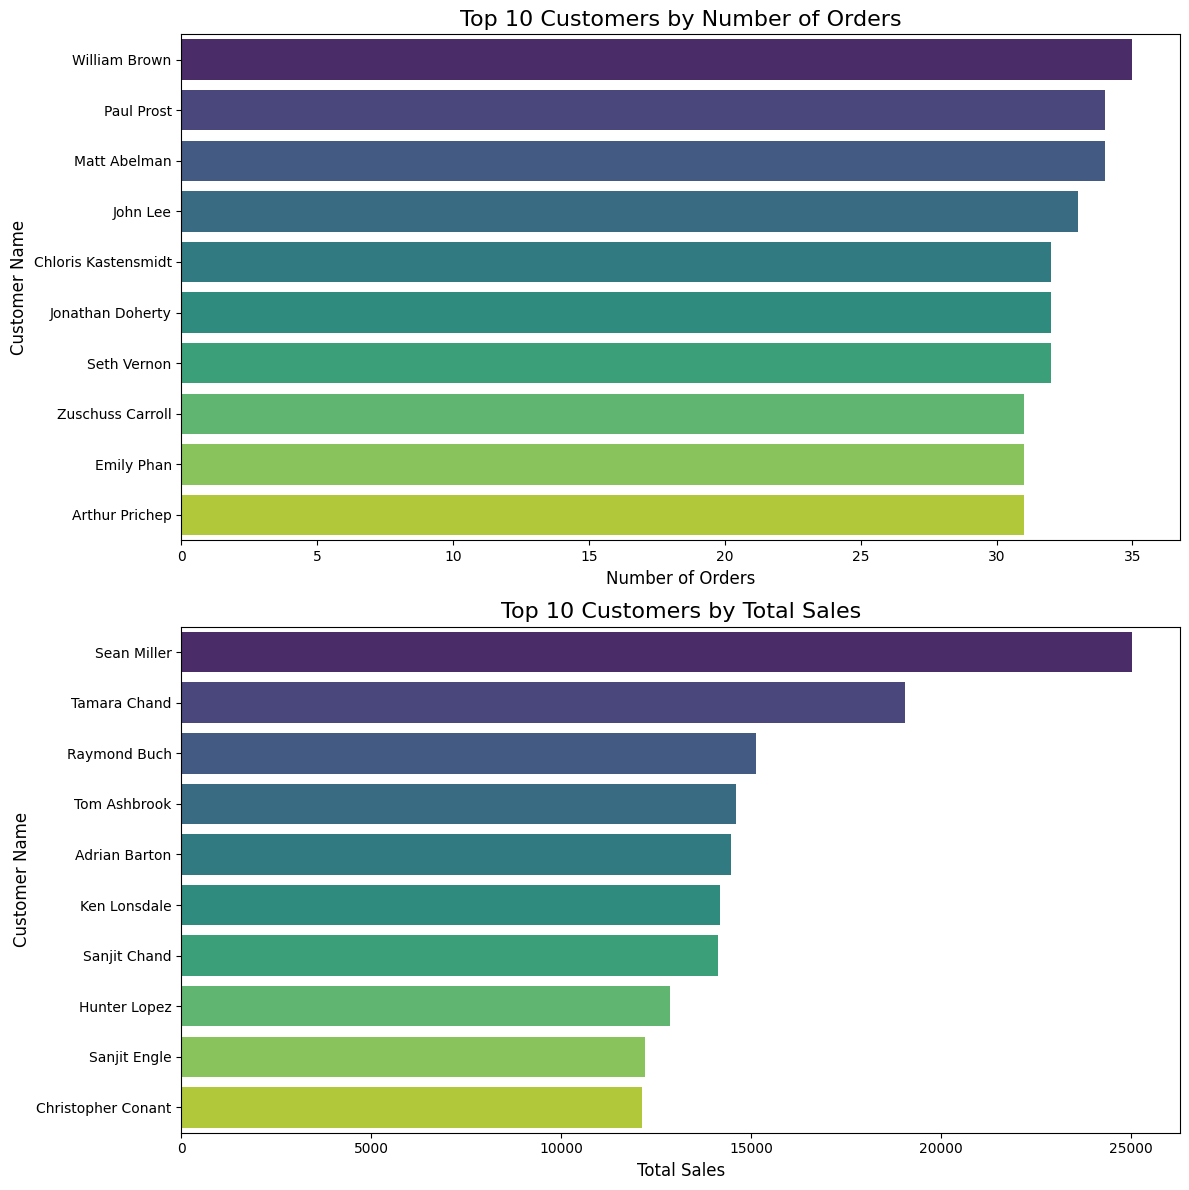

In [148]:
# Aggregate data for top customers by number of orders
customer_orders = df.groupby('Customer Name')['Order Date'].count().reset_index()
customer_orders = customer_orders.rename(columns={'Order Date': 'Order Count'}).sort_values(by='Order Count',ascending=False).head(10)


# Aggregate data for top customers by sales
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# First subplot: Top 10 customers by number of orders
plt.subplot(2, 1, 1) 
sns.barplot(
    data=customer_orders,
    x='Order Count', 
    y='Customer Name',
    palette='viridis'
)
plt.title('Top 10 Customers by Number of Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)

# Second subplot: Top 10 customers by total sales
plt.subplot(2, 1, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(
    data=customer_sales,
    x='Sales', 
    y='Customer Name',
    palette='viridis'
)
plt.title('Top 10 Customers by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)


plt.tight_layout()
plt.show()


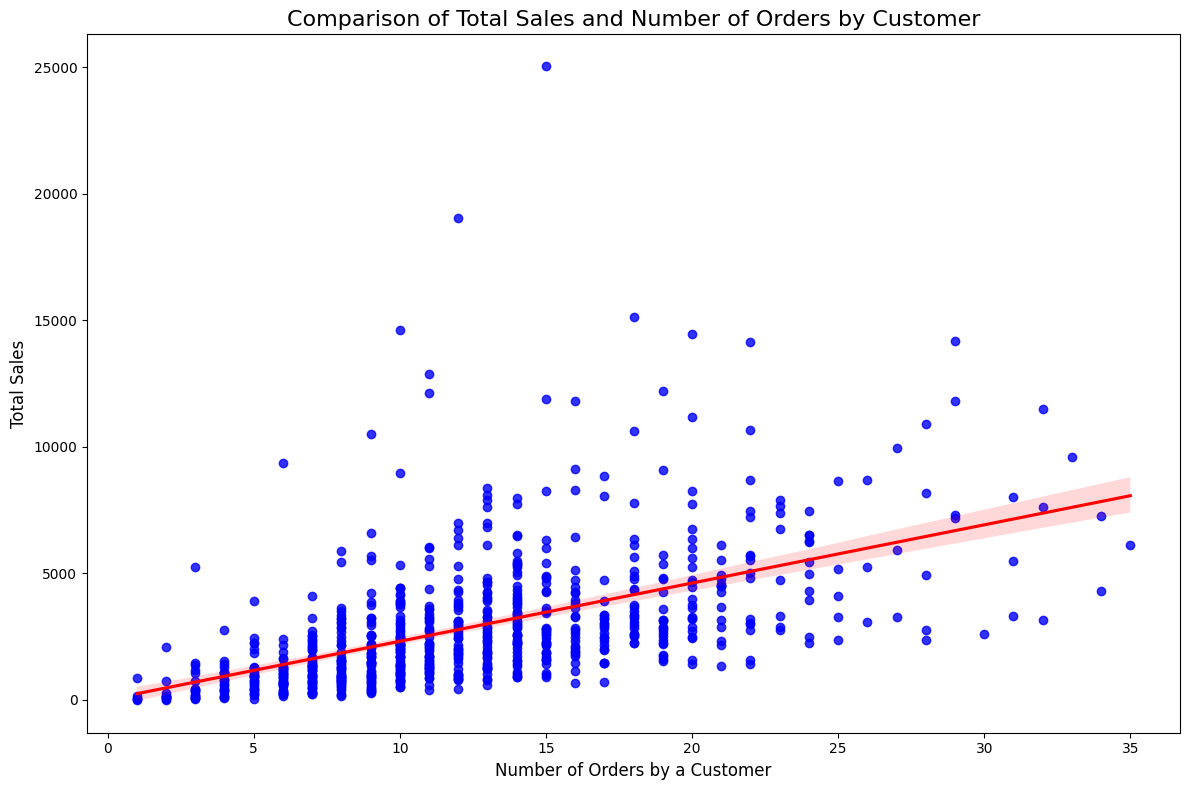

In [211]:

customer_orders = df.groupby('Customer Name')['Order Date'].count().reset_index(name='Order Count')
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index(name='Sales')

# Merge the aggregated data into one DataFrame
customer_data = pd.merge(customer_orders, customer_sales, on='Customer Name')


# Step 4: Create a scatter plot to compare total sales vs number of orders
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Order Count', 
    y='Sales', 
    data=customer_data,
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'red'},
    

)

# Adding titles and labels
plt.title('Comparison of Total Sales and Number of Orders by Customer', fontsize=16)
plt.xlabel('Number of Orders by a Customer', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()


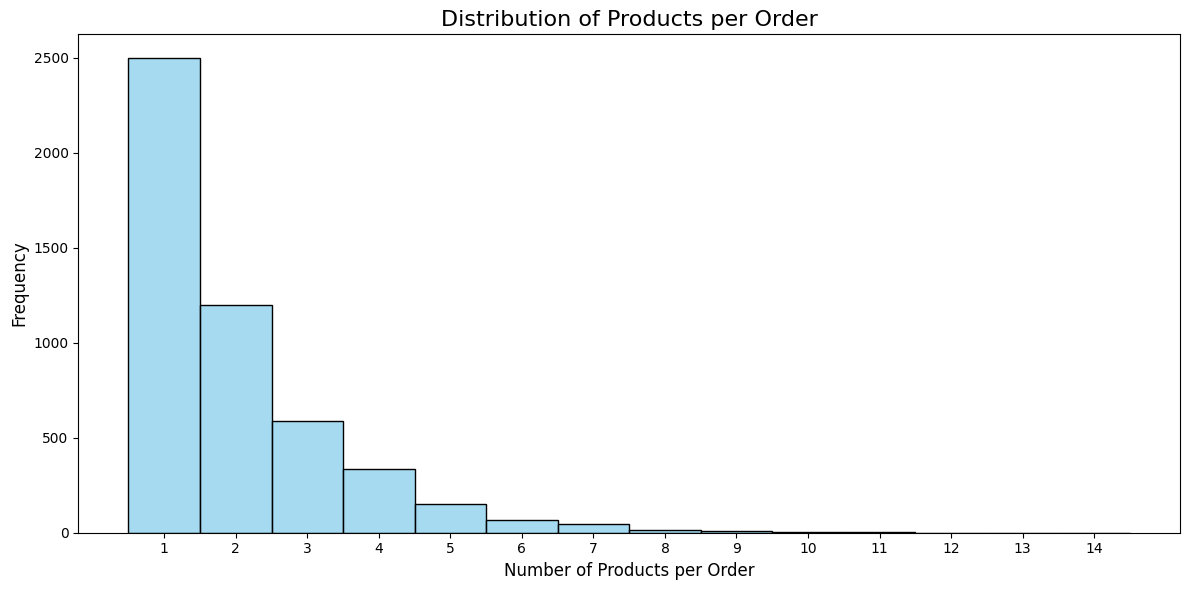

In [159]:
# Distribution or products per order
order_item_count = df.groupby('Order ID')['Product ID'].count().reset_index()


plt.figure(figsize=(12, 6))

sns.histplot(order_item_count['Product ID'], kde=False, color='skyblue', discrete=True, bins=range(1, order_item_count['Product ID'].max() + 2))
plt.title('Distribution of Products per Order', fontsize=16)
plt.xlabel('Number of Products per Order', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust x-axis ticks to show all values
plt.xticks(range(1, order_item_count['Product ID'].max() + 1))

plt.tight_layout()
plt.show()


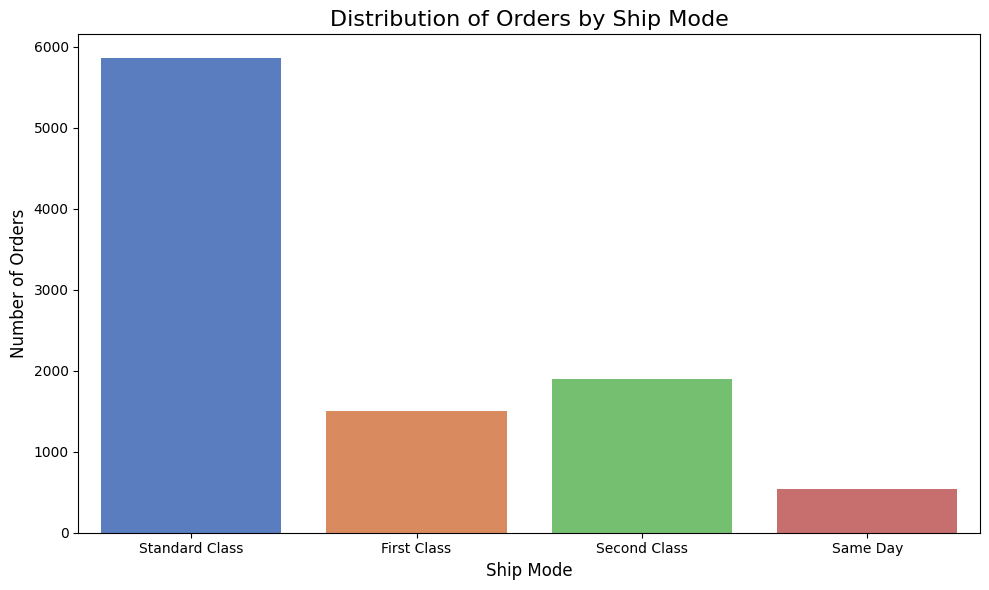

In [172]:
# Distribution of order by ship mode
plt.figure(figsize=(10, 6))

sns.countplot(
    x='Ship Mode',
    data=df,
    palette='muted'
)

plt.title('Distribution of Orders by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.tight_layout()
plt.show()


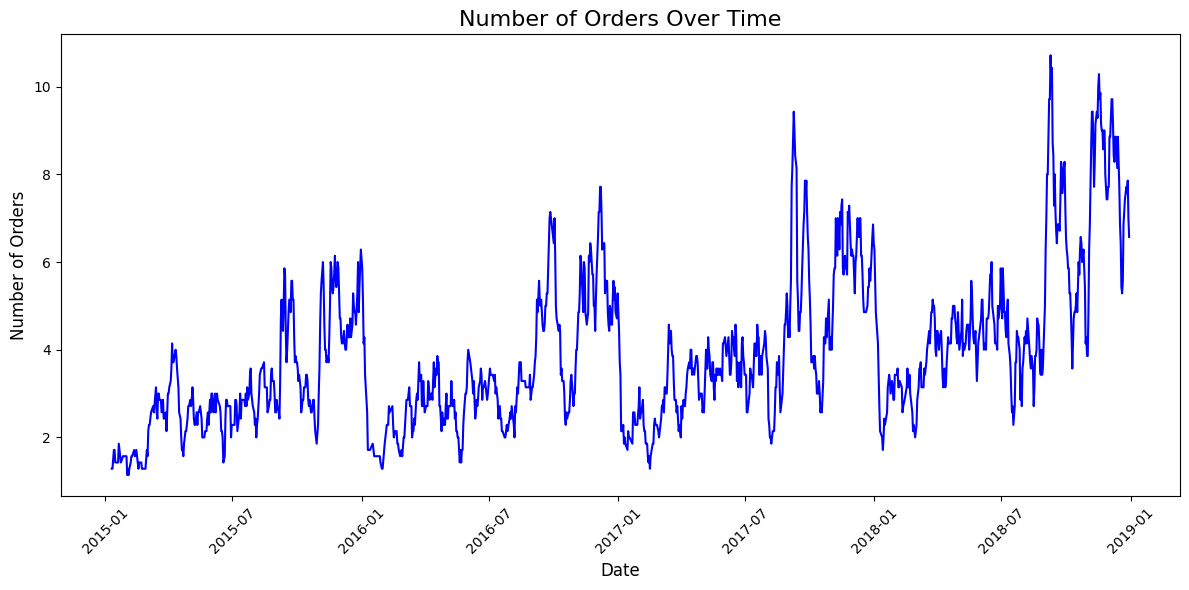

In [ ]:
# Numbers of orders over time
# Group by date and count the number of orders placed on each date
orders_by_date = df.groupby(df['Order Date'].dt.date)['Order ID'].nunique()

# Apply a rolling mean (moving average) to smooth the data (window size of 7 days)
orders_smooth = orders_by_date.rolling(window=7).mean()


plt.figure(figsize=(12, 6))
sns.lineplot(
    x=orders_by_date.index,
    y=orders_smooth.values, 
    color='b')

plt.title('Number of Orders Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


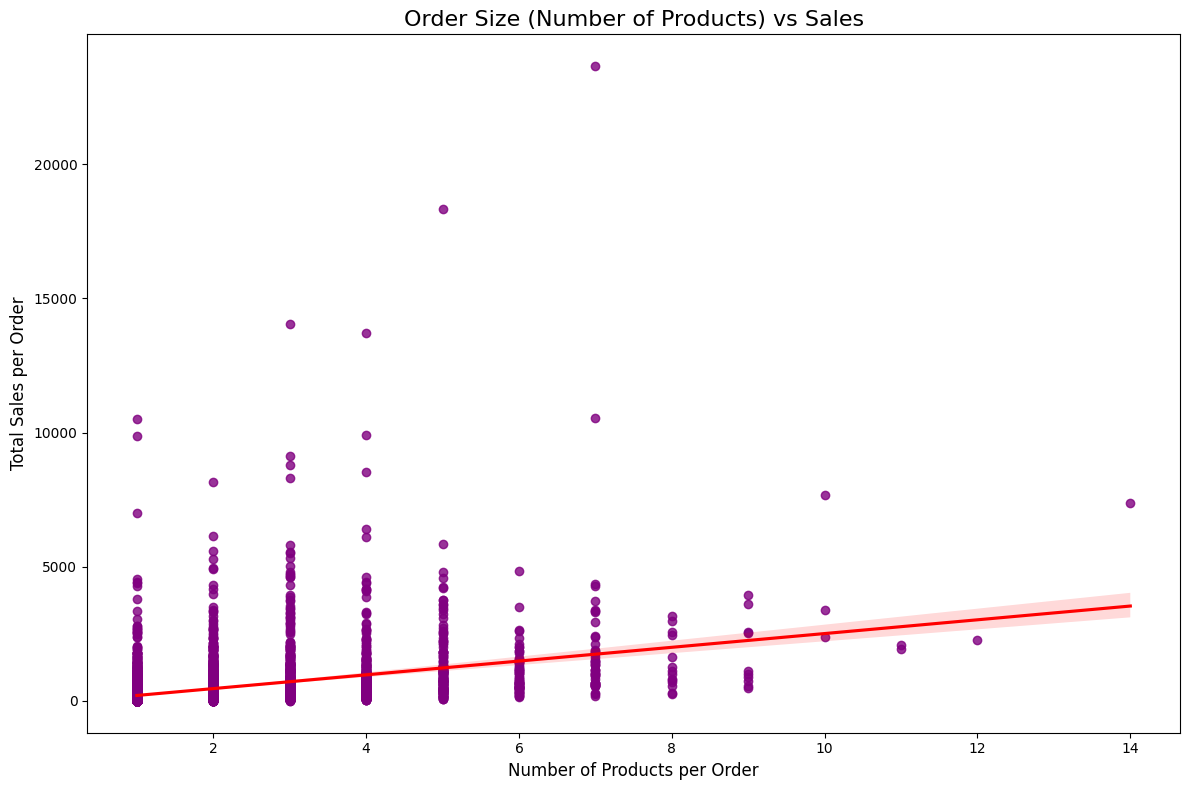

In [ ]:
# Order size vs Sales

order_sizes = df.groupby('Order ID')['Product ID'].nunique().reset_index()
order_sizes.rename(columns={'Product ID': 'Number of Products'}, inplace=True)

# Calculate total sales per order
order_sales = df.groupby('Order ID')['Sales'].sum().reset_index()

# Merge the data on 'Order ID' to have both Number of Products and Sales in the same DataFrame
order_data = pd.merge(order_sizes, order_sales, on='Order ID')


plt.figure(figsize=(12, 8))

sns.regplot(
    data=order_data, 
    x='Number of Products', 
    y='Sales',
    scatter_kws={'color': 'purple'}, 
    line_kws={'color': 'red'})


plt.title('Order Size (Number of Products) vs Sales', fontsize=16)
plt.xlabel('Number of Products per Order', fontsize=12)
plt.ylabel('Total Sales per Order', fontsize=12)


plt.tight_layout()
plt.show()




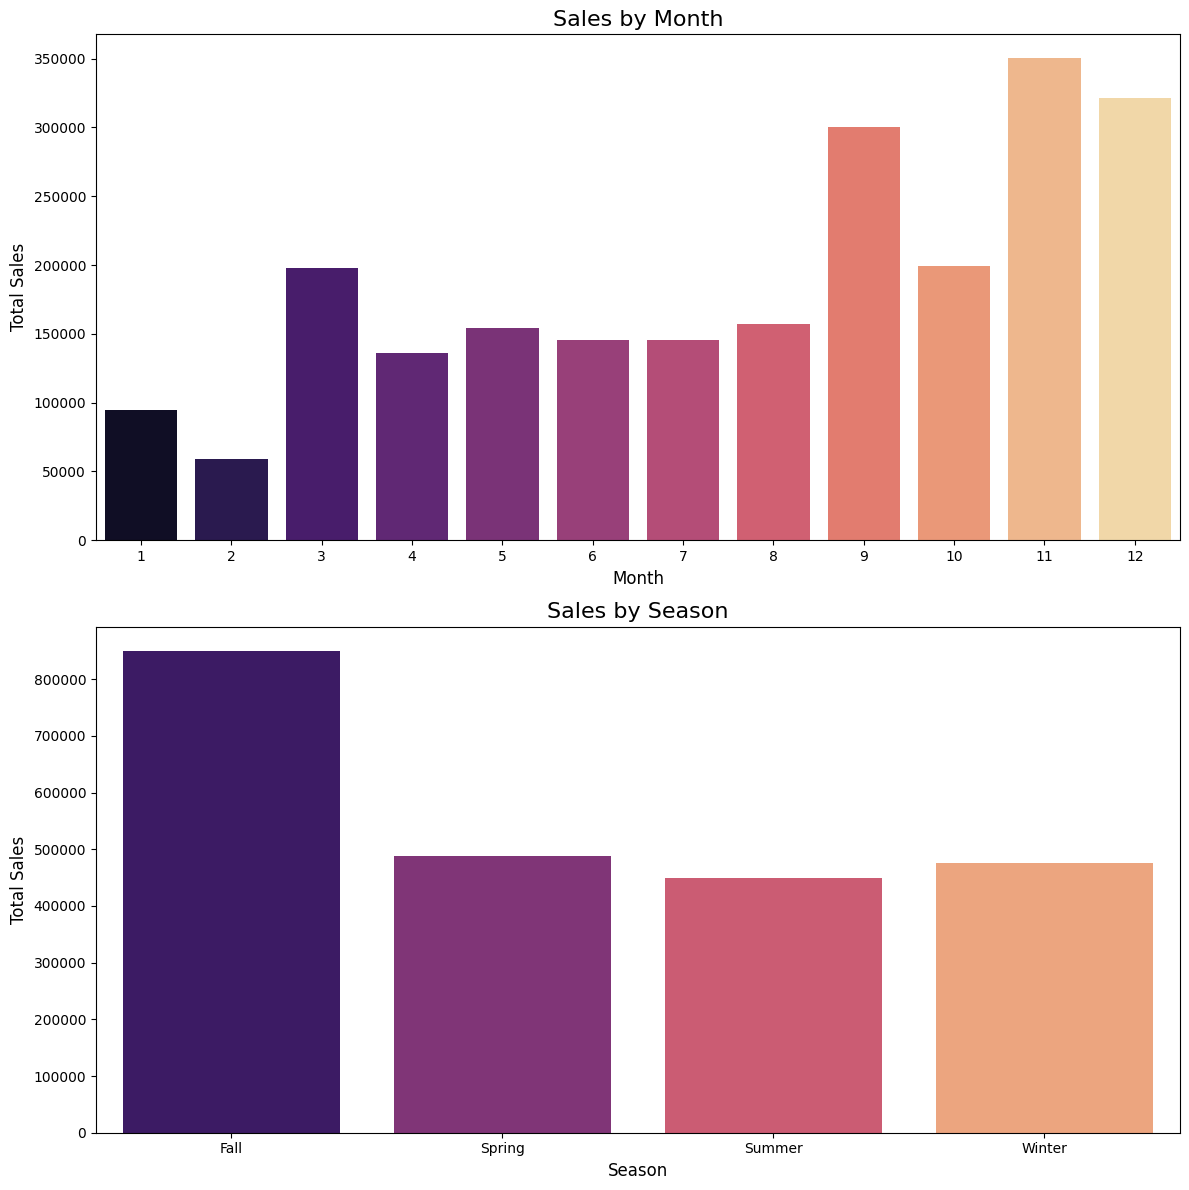

Correlation between Month and Sales: 0.83


In [200]:
# Orders per month and season

# Extract Month
df['Month'] = df['Order Date'].dt.month

# Create a 'Season' column based on month (for seasonal analysis)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
seasonal_sales = df.groupby('Season')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.barplot(
    x='Month', 
    y='Sales', 
    data=monthly_sales, 
    palette='magma')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.subplot(2, 1, 2)
sns.barplot(
    x='Season', 
    y='Sales',
    data=seasonal_sales, 
    palette='magma')

plt.title('Sales by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)


plt.tight_layout()
plt.show()


# Correlate sales with months (if you want a numerical correlation)
monthly_sales_corr = monthly_sales['Month'].corr(monthly_sales['Sales'])
print(f"Correlation between Month and Sales: {monthly_sales_corr:.2f}")


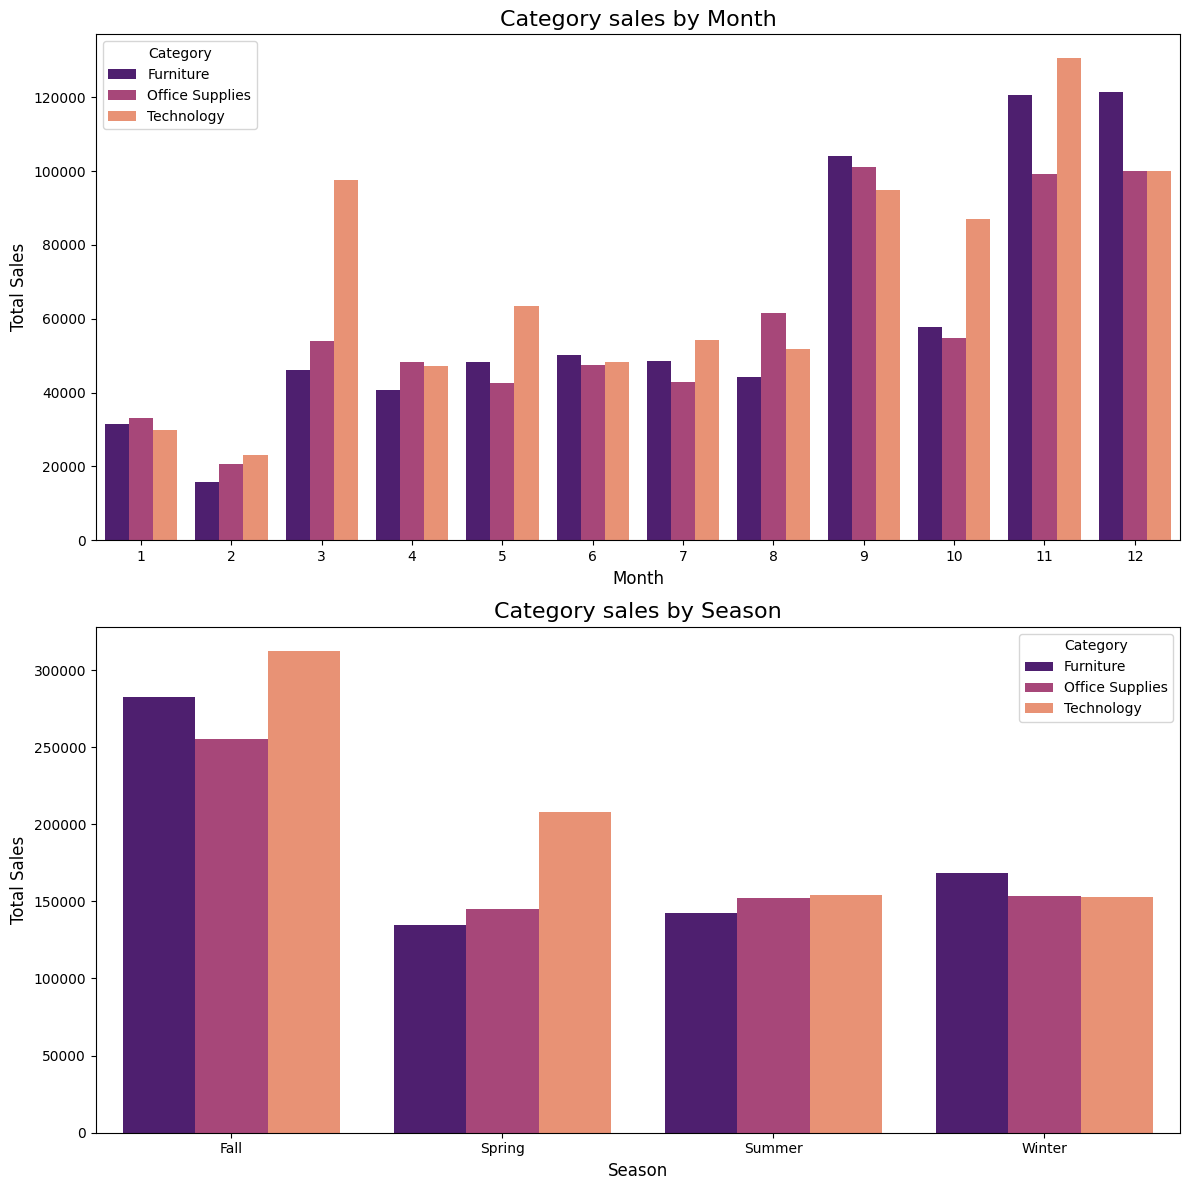

Correlation between Month and Sales: 0.78


In [207]:
# Orders per month and season

# Extract Month
df['Month'] = df['Order Date'].dt.month

# Create a 'Season' column based on month (for seasonal analysis)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

monthly_sales = df.groupby(['Category','Month'])['Sales'].sum().reset_index()
seasonal_sales = df.groupby(['Category','Season'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.barplot(
    x='Month', 
    y='Sales', 
    data=monthly_sales, 
    hue='Category',
    palette='magma')
plt.title('Category sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.subplot(2, 1, 2)
sns.barplot(
    x='Season', 
    y='Sales',
    data=seasonal_sales, 
    hue='Category',
    palette='magma')

plt.title('Category sales by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)


plt.tight_layout()
plt.show()


# Correlate sales with months (if you want a numerical correlation)
monthly_sales_corr = monthly_sales['Month'].corr(monthly_sales['Sales'])
print(f"Correlation between Month and Sales: {monthly_sales_corr:.2f}")
